In [3]:
import pandas as pd
import matplotlib.pyplot as plt

fama_df = pd.read_excel('FamaFrench_RawData.xlsx',sheet_name='Sheet2',skiprows = 3)

fama_df.head()

,Date,Mkt-RF,SMB,HML,UMD,BA,Int,Exx
0,2000-01-03,1000.000000,1000.000000,1000.000000,1000.000000,24.21875,43.50000,39.15625
1,2000-01-04,959.400000,999.600000,1022.100000,981.400000,22.78125,41.46875,38.40625
2,2000-01-05,958.536540,1001.399280,1023.530940,976.394860,23.03125,41.81250,40.50000
3,2000-01-06,951.539223,994.689905,1037.655667,961.846577,25.00000,39.37500,42.59375
4,2000-01-07,982.083632,988.821234,1024.788737,967.617656,24.34375,41.00000,42.46875


## Plot Price Series

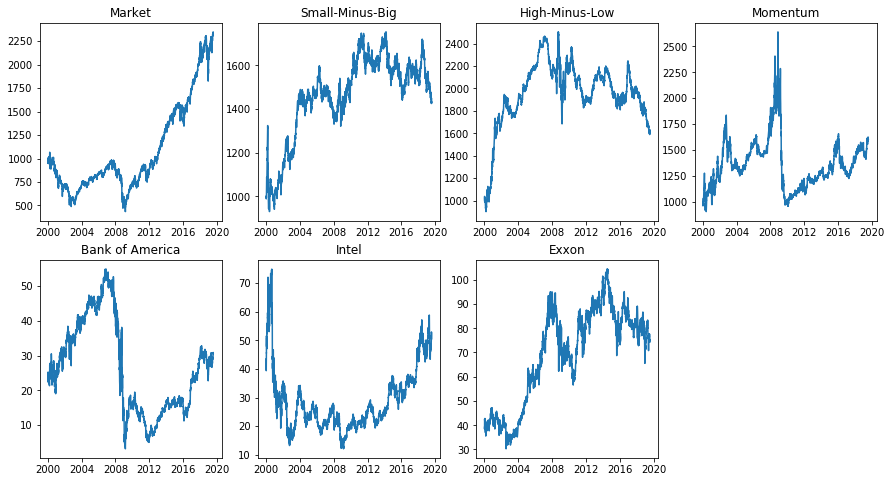

In [52]:
f, axs = plt.subplots(2,4)
f.delaxes(axs[1][3])

axs[0,0].plot('Date','Mkt-RF',data=fama_df)
axs[0,0].set_title('Market')
axs[0,1].plot('Date','SMB',data=fama_df)
axs[0,1].set_title('Small-Minus-Big')
axs[0,2].plot('Date','HML',data=fama_df)
axs[0,2].set_title('High-Minus-Low')
axs[0,3].plot('Date','UMD',data=fama_df)
axs[0,3].set_title('Momentum')
axs[1,0].plot('Date','BA',data=fama_df)
axs[1,0].set_title('Bank of America')
axs[1,1].plot('Date','Int',data=fama_df)
axs[1,1].set_title('Intel')
axs[1,2].plot('Date','Exx',data=fama_df)
axs[1,2].set_title('Exxon')

f.set_figheight(8)
f.set_figwidth(15)

In [53]:
f.savefig('results/fig_price_series.eps')

In [6]:
returns_df = fama_df.loc[:,fama_df.columns != 'Date'].pct_change()
returns_df['Date'] = fama_df['Date']
returns_df.head()

,Mkt-RF,SMB,HML,UMD,BA,Int,Exx,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03
1,-0.0406,-0.0004,0.0221,-0.0186,-0.059355,-0.046695,-0.019154,2000-01-04
2,-0.0009,0.0018,0.0014,-0.0051,0.010974,0.008289,0.054516,2000-01-05
3,-0.0073,-0.0067,0.0138,-0.0149,0.085482,-0.058296,0.051698,2000-01-06
4,0.0321,-0.0059,-0.0124,0.0060,-0.026250,0.041270,-0.002935,2000-01-07


In [7]:
returns_df.describe()

,Mkt-RF,SMB,HML,UMD,BA,Int,Exx
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,0.000243,0.000094,0.000121,0.000144,0.000464,0.000303,0.000245
std,0.012093,0.006113,0.006600,0.009851,0.028925,0.023302,0.015132
min,-0.089500,-0.050900,-0.042400,-0.082100,-0.289694,-0.220330,-0.139525
25%,-0.004900,-0.003400,-0.002900,-0.004100,-0.009556,-0.010412,-0.007326
50%,0.000600,0.000200,0.000000,0.000600,0.000000,0.000410,0.000287
75%,0.005800,0.003600,0.002800,0.004700,0.009821,0.011125,0.007922
max,0.113500,0.038100,0.048300,0.070100,0.352691,0.201229,0.171905


## Plot Returns Series

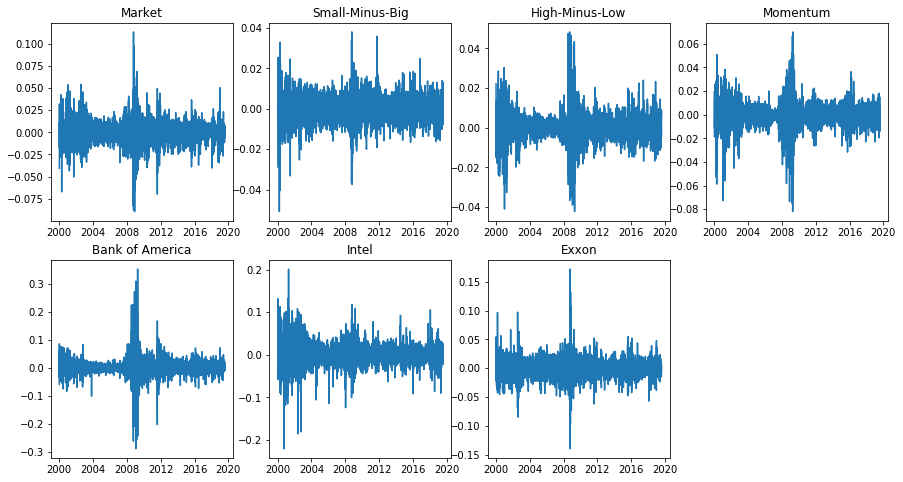

In [54]:
f2, axs = plt.subplots(2,4)
f2.delaxes(axs[1][3])

axs[0,0].plot('Date','Mkt-RF',data=returns_df)
axs[0,0].set_title('Market')
axs[0,1].plot('Date','SMB',data=returns_df)
axs[0,1].set_title('Small-Minus-Big')
axs[0,2].plot('Date','HML',data=returns_df)
axs[0,2].set_title('High-Minus-Low')
axs[0,3].plot('Date','UMD',data=returns_df)
axs[0,3].set_title('Momentum')
axs[1,0].plot('Date','BA',data=returns_df)
axs[1,0].set_title('Bank of America')
axs[1,1].plot('Date','Int',data=returns_df)
axs[1,1].set_title('Intel')
axs[1,2].plot('Date','Exx',data=returns_df)
axs[1,2].set_title('Exxon')

f2.set_figheight(8)
f2.set_figwidth(15)

In [55]:
f2.savefig('results/fig_returns_series.eps')

## Estimate Fama-French 3 Factor Model using OLS asset-by-asset

In [9]:
import statsmodels.api as sm
returns_df['const'] = 1 # Add constant for OLS
returns_df.head()

,Mkt-RF,SMB,HML,UMD,BA,Int,Exx,Date,const
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,1
1,-0.0406,-0.0004,0.0221,-0.0186,-0.059355,-0.046695,-0.019154,2000-01-04,1
2,-0.0009,0.0018,0.0014,-0.0051,0.010974,0.008289,0.054516,2000-01-05,1
3,-0.0073,-0.0067,0.0138,-0.0149,0.085482,-0.058296,0.051698,2000-01-06,1
4,0.0321,-0.0059,-0.0124,0.0060,-0.026250,0.041270,-0.002935,2000-01-07,1


#### Calculate excess returns

In [39]:
risk_free = (1.02)**(1/256) - 1 # Assuming 2% risk-free rate per annum and 256 business days

excess_returns = returns_df
excess_returns['Mkt-RF'] = excess_returns['Mkt-RF'] - risk_free
excess_returns[['BA','Int','Exx']] = excess_returns[['BA','Int','Exx']] - risk_free
excess_returns.head(10)

,Mkt-RF,SMB,HML,UMD,BA,Int,Exx,Date,const
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,1
1,-0.040755,-0.0004,0.0221,-0.0186,-0.059510,-0.046850,-0.019309,2000-01-04,1
2,-0.001055,0.0018,0.0014,-0.0051,0.010819,0.008135,0.054361,2000-01-05,1
3,-0.007455,-0.0067,0.0138,-0.0149,0.085327,-0.058451,0.051543,2000-01-06,1
4,0.031945,-0.0059,-0.0124,0.0060,-0.026405,0.041115,-0.003089,2000-01-07,1
5,0.017445,0.0100,-0.0151,0.0200,-0.034815,0.045577,-0.014136,2000-01-10,1
6,-0.017255,0.0020,0.0093,-0.0115,-0.021431,0.045764,0.002830,2000-01-11,1
7,-0.007055,-0.0053,0.0091,-0.0066,0.010715,0.017267,-0.006107,2000-01-12,1
8,0.015745,0.0100,-0.0131,0.0023,0.022695,-0.002210,0.023049,2000-01-13,1
9,0.011345,0.0009,-0.0019,0.0118,0.061606,0.131623,-0.019906,2000-01-14,1


#### Bank of America on 3 factors

In [40]:
Fama_BA = sm.OLS(endog = excess_returns['BA'],exog = excess_returns[['const','Mkt-RF','SMB','HML']],missing='drop')
F_BA_results = Fama_BA.fit()
print(F_BA_results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2748.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:46   Log-Likelihood:                 12883.
No. Observations:                4924   AIC:                        -2.576e+04
Df Residuals:                    4920   BIC:                        -2.573e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.302e-05      0.000     -0.091      0.9

#### Intel on 3 factors

In [41]:
Fama_Int = sm.OLS(endog = excess_returns['Int'],exog = excess_returns[['const','Mkt-RF','SMB','HML']],missing='drop')
F_Int_results = Fama_Int.fit()
print(F_Int_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Int   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1435.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:47   Log-Likelihood:                 13072.
No. Observations:                4924   AIC:                        -2.614e+04
Df Residuals:                    4920   BIC:                        -2.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.502      0.6

#### Exxon on 3 factors

In [42]:
Fama_Exx = sm.OLS(endog = excess_returns['Exx'],exog = excess_returns[['const','Mkt-RF','SMB','HML']],missing='drop')
F_Exx_results = Fama_Exx.fit()
print(F_Exx_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Exx   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1282.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:48   Log-Likelihood:                 15072.
No. Observations:                4924   AIC:                        -3.014e+04
Df Residuals:                    4920   BIC:                        -3.011e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.803e-05      0.000      0.173      0.8

## Estimate Carhart 4 Factor Model using OLS asset-by-asset

#### Bank of America on 4 factors

In [43]:
Carhart_BA = sm.OLS(endog = excess_returns['BA'],exog = excess_returns[['const','Mkt-RF','SMB','HML','UMD']],missing='drop')
BA_results = Carhart_BA.fit()
print(BA_results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2234.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:49   Log-Likelihood:                 13009.
No. Observations:                4924   AIC:                        -2.601e+04
Df Residuals:                    4919   BIC:                        -2.598e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.91e-05      0.000      0.281      0.7

#### Intel on 4 factors

In [44]:
# Estimate Carhart 4 Factor Model using OLS asset-by-asset
Carhart_Int = sm.OLS(endog = excess_returns['Int'],exog = excess_returns[['const','Mkt-RF','SMB','HML','UMD']],missing='drop')
Int_results = Carhart_Int.fit()
print(Int_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Int   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1143.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:50   Log-Likelihood:                 13142.
No. Observations:                4924   AIC:                        -2.627e+04
Df Residuals:                    4919   BIC:                        -2.624e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.788      0.4

#### Exxon on 4 factors

In [45]:
# Estimate Carhart 4 Factor Model using OLS asset-by-asset
Carhart_Exx = sm.OLS(endog = excess_returns['Exx'],exog = excess_returns[['const','Mkt-RF','SMB','HML','UMD']],missing='drop')
Exx_results = Carhart_Exx.fit()
print(Exx_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Exx   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     997.2
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:55:51   Log-Likelihood:                 15112.
No. Observations:                4924   AIC:                        -3.021e+04
Df Residuals:                    4919   BIC:                        -3.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.584e-06      0.000     -0.035      0.9

## Compare Results

In [50]:
res_summary = summary_col([BA_results,F_BA_results,Int_results,F_Int_results,Exx_results,F_Exx_results],
                          stars=True,float_format='%0.2f',
                          info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
res_summary.add_title(title='Linear Regression Results of the 3-Factor and 4-Factor Model')
print(res_summary)

Linear Regression Results of the 3-Factor and 4-Factor Model
         BA I    BA II    Int I    Int II   Exx I    Exx II 
------------------------------------------------------------
HML    1.71***  1.92***  -0.76*** -0.61*** 0.26***  0.18*** 
       (0.04)   (0.04)   (0.04)   (0.04)   (0.03)   (0.02)  
Mkt-RF 1.41***  1.52***  1.22***  1.30***  0.86***  0.82*** 
       (0.02)   (0.02)   (0.02)   (0.02)   (0.01)   (0.01)  
SMB    -0.29*** -0.36*** -0.10**  -0.16*** -0.38*** -0.35***
       (0.04)   (0.04)   (0.04)   (0.04)   (0.03)   (0.03)  
UMD    -0.45***          -0.33***          0.16***          
       (0.03)            (0.03)            (0.02)           
const  0.00     -0.00    0.00     0.00     -0.00    0.00    
       (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
N      4924     4924     4924     4924     4924     4924    
R2     0.64     0.63     0.48     0.47     0.45     0.44    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Save Results

In [49]:
f = open('results/partie3_regcomp.tex','w')
f.write(res_summary.as_latex())
f.close()